# Impor Modul

In [255]:
import pandas as pd
import numpy as np

from wordcloud import WordCloud
import matplotlib.pyplot as plt

import re
import string
import nltk
# nltk.download('stopwords')
# nltk.download('wordnet')
from nltk.corpus import stopwords

import random

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Impor Data

Terdapat tiga data dalam **dua bahasa**, yaitu data tweet berbahasa Indonesia (_id_) dan Inggris (_en_).

In [256]:
df_id1 = pd.read_csv('outputs\mandalika_2020-11-20_2021-11-20_id.csv')
df_id2 = pd.read_csv('outputs\mandalika_2021-11-20_2021-11-21_id.csv')
df_en = pd.read_csv('outputs\mandalika_2020-11-20_2021-11-20_en.csv')

## Tweet Indonesia

Mengamati ukuran kedua data berbahasa Indonesia. Data kedua diambil menyusul pada tanggal 21 November 2021.

In [257]:
print(df_id1.shape)
print(df_id2.shape)

(8105, 11)
(74, 11)


In [258]:
df_id = pd.concat([df_id1, df_id2], axis=0)
print(f'Ukuran dataframe baru = {df_id.shape}')
print(f'Kolom: {df_id.columns}')
df_id.head()

Ukuran dataframe baru = (8179, 11)
Kolom: Index(['UserScreenName', 'UserName', 'Timestamp', 'Text', 'Embedded_text',
       'Emojis', 'Comments', 'Likes', 'Retweets', 'Image link', 'Tweet URL'],
      dtype='object')


,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL
0,TOGOG,@MinakMegaow,2020-11-20T23:08:49.000Z,"TOGOG\n@MinakMegaow\n·\nNov 21, 2020",Bandara International Lombok dibenahi utk meny...,NaN,NaN,NaN,1,['https://pbs.twimg.com/media/EnTXdLwVoAAsJeI?...,https://twitter.com/MinakMegaow/status/1329924...
1,Jerry The Fred™,@TheMornin9,2020-11-20T09:44:59.000Z,"Jerry The Fred™\n@TheMornin9\n·\nNov 20, 2020","asik bener sirkuit Portimao, naek turun..\nMan...",NaN,1,NaN,2,[],https://twitter.com/TheMornin9/status/13297223...
2,Mandor Tambal Ban,@YB1VK,2020-11-20T11:26:40.000Z,"Mandor Tambal Ban\n@YB1VK\n·\nNov 20, 2020",Replying to \n@daffana\nEh kirain teasernya Ma...,NaN,1,NaN,NaN,[],https://twitter.com/YB1VK/status/1329747986088...
3,Creating Destinations,@ITDC_id,2020-11-20T02:19:10.000Z,"Creating Destinations\n@ITDC_id\n·\nNov 20, 2020",DPD RI mengunjungi dan melihat langsung proses...,NaN,1,NaN,NaN,[],https://twitter.com/ITDC_id/status/13296102048...
4,Dre!,@andrekelv,2020-11-20T16:38:26.000Z,"Dre!\n@andrekelv\n·\nNov 20, 2020",Replying to \n@detikcom\nLah gmna? Katanya kem...,NaN,NaN,NaN,NaN,[],https://twitter.com/andrekelv/status/132982644...


Mengecek jumlah null per kolom

In [259]:
df_id.isnull().sum()

UserScreenName      33
UserName             3
Timestamp            0
Text                 0
Embedded_text        0
Emojis            6385
Comments          5297
Likes             6005
Retweets          4270
Image link           0
Tweet URL            0
dtype: int64

Drop kolom yang kurang relevan (Atau ambil kolom yang relevan)

In [260]:
# df_id.drop(['UserScreenName', 'UserName', 'Timestamp', 'Text', 'Emojis', 'Comments', 'Likes', 'Retweets',
#             'Image link', 'Tweet URL'], axis=1, inplace=True)
df_id = df_id[['Embedded_text']]
df_id.reset_index()
df_id

,Embedded_text
0,Bandara International Lombok dibenahi utk meny...
1,"asik bener sirkuit Portimao, naek turun..\nMan..."
2,Replying to \n@daffana\nEh kirain teasernya Ma...
3,DPD RI mengunjungi dan melihat langsung proses...
4,Replying to \n@detikcom\nLah gmna? Katanya kem...
...,...
69,Wonderfull Indonesia. \n\nMomen Pembalap World...
70,Gubernur Papua Lukas enembe mengatakan wisuda ...
71,"Prokesnya tetep ketat kok, NTB sudah masuk PPK..."
72,Pawang hujan yang Mandalika butuhkan saat ini....


Cek ulang jumlah null per kolom

In [261]:
df_id.isnull().sum()

Embedded_text    0
dtype: int64

Menyajikan **wordcloud** mula-mula (untuk data yang belum diproses). Fungsinya untuk melihat kata-kata yang sering muncul, dan juga berguna untuk melihat beberapa _stopwords_.

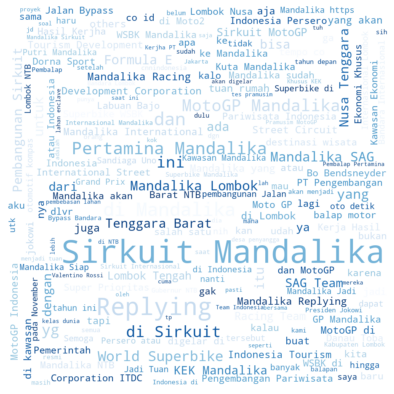

In [262]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = ' '.join(word for word in df_id['Embedded_text'])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA',
                      background_color='white').generate(all_text)
plt.figure(figsize=(14,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=2, y=2)
plt.show()

In [263]:
df_id.iloc[:10]

,Embedded_text
0,Bandara International Lombok dibenahi utk meny...
1,"asik bener sirkuit Portimao, naek turun..\nMan..."
2,Replying to \n@daffana\nEh kirain teasernya Ma...
3,DPD RI mengunjungi dan melihat langsung proses...
4,Replying to \n@detikcom\nLah gmna? Katanya kem...
5,MotoGP: Sirkuit Mandalika Target Selesai Perte...
6,Indonesia's Mandalika MotoGP circuit ready for...
7,Lima Bali Baru ini meliputi Danau Toba di Suma...
8,Menteri Pekerjaan Umum dan Perumahan Rakyat (P...
9,Replying to \n@kisendiRI81\n @bangZhack68\n an...


#### Cleaning 1
Membuat teks menjadi huruf kecil (_lowercase_), hapus teks dalam tanda kurung siku, hapus tautan, hapus tanda baca, dan hapus kata-kata yang mengandung angka, dll.

In [264]:
def clean_text(text):    
    text = text.lower() # membuat lowercase
    text = re.sub('([@#][A-Za-z0-9_]+)|(\w+:\/\/\S+)', '', text) # menghapus @<user_id>
    text = re.sub(r'^(replying to)', '', text) # menghapus kata 'Replying to' karena sering muncul
    text = re.sub('https?://\S+|www\.\S+', '', text) # menghapus URL/link
    text = re.sub(r'\.+', '.', text) # mengganti multiple fullstop menjadi single fullstop
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # menghapus tanda baca
    text = re.sub('\n', ' ', text) # menghapus \n
    text = re.sub(r'(\w)\1{2,}', r'\1', text) # menghapus huruf/karakter berulang
    # text = text.strip() # menghapus multiple spaces
    text = ''.join([i for i in text if not i.isdigit()])
    text = ' '.join(text.split())
    return text

In [265]:
df_id_copy0 = df_id.copy()
df_id_copy0['Embedded_text'] = df_id_copy0['Embedded_text'].apply(lambda x: clean_text(x))

#### Print perbandingan sebelum dan sesudah penerapan _clean_text()_

In [266]:
for i in random.sample(range(df_id.shape[0]), 10):
    print(f'\033[1mBEFORE:\033[0m {df_id.Embedded_text.iloc[i]}\n\033[1mAFTER :\033[0m {df_id_copy0.Embedded_text.iloc[i]}\n')

BEFORE: Pusat Medis dan Helipad Sirkuit Mandalika Rampung, Siap Homologasi FIM
oto.detik.com
Pusat Medis dan Helipad Sirkuit Mandalika Rampung, Siap Homologasi FIM
Mandalika Grand Pix Association mengabarkan bahwa pada Sabtu lalu, bangunan medical centre atau pusat medis dan helipad di Sirkuti Mandalika sudah selesai.
AFTER : pusat medis dan helipad sirkuit mandalika rampung siap homologasi fim otodetikcom pusat medis dan helipad sirkuit mandalika rampung siap homologasi fim mandalika grand pix association mengabarkan bahwa pada sabtu lalu bangunan medical centre atau pusat medis dan helipad di sirkuti mandalika sudah selesai

BEFORE: Pembangunan sirkuit balap di Mandalika, Nusa Tenggara Barat terus berlanjut meski mendapat kritikan dari PBB soal pengabaian hak asasi manusia masyarakat setempat.

Sebuah utas  https://bbc.com/indonesia/indonesia-56990775…
7
107
235
AFTER : pembangunan sirkuit balap di mandalika nusa tenggara barat terus berlanjut meski mendapat kritikan dari pbb soal pe

#### Cleaning 2

In [267]:
# import stopword dari Sastrawi, library untuk NLP khusus kata-kata berbahasa Indonesia
factory = StopWordRemoverFactory()
stopword = factory.get_stop_words()
# Sekalian tambahkan kata tambahan yang ingin dihapus, misal singkatan atau bisa juga dengan melihat wordcloud
stopword  = stopword + ['yg', 'bhw', 'jd', 'yth', 'nya', 'dgn', 'dlm', 'mnrt', 'shg', 'sblm', 'kpd', 'shrsnya'] \
    + ['spt', 'nnti', 'dlm', 'ttg', 'thd', 'thdp', 'utk', 'jg']
print(stopword)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [268]:
def remove_stopwords(text, stem=False):
    tokens = []
    for token in text.split():
        if token not in stopword:
            tokens.append(token)
    return " ".join(tokens)

In [269]:
df_id_copy1 = df_id_copy0.copy()
df_id_copy1['Embedded_text'] = df_id_copy1['Embedded_text'].apply(lambda x: remove_stopwords(x))

#### Print perbandingan sebelum dan sesudah penerapan _remove_stopwords()_

In [270]:
for i in random.sample(range(df_id_copy0.shape[0]), 10):
    print(f'\033[1m({i}) BEFORE:\033[0m {df_id_copy0.Embedded_text.iloc[i]}\n\033[1m({i}) AFTER :\033[0m {df_id_copy1.Embedded_text.iloc[i]}\n')

(4216) BEFORE: semoga kunjungan dan studi kasus makin mengeratkan kami dan para pemangku kepentingan untuk bahu membahu membangun the mandalika
(4216) AFTER : semoga kunjungan studi kasus makin mengeratkan pemangku kepentingan bahu membahu membangun the mandalika

(4514) BEFORE: and others ini yg saya maksud dari awal alias ayok lah itu mandalika bisain
(4514) AFTER : and others maksud awal alias ayok lah mandalika bisain

(7372) BEFORE: intip kesiapan menjelang cat dari jerman hingga tribun vvip penonton via lomboktribunnewscom intip kesiapan sirkuit mandalika menjelang wsbk cat dari jerman hingga tribun vvip penonton menjelang motul fim wsbk seri indonesia november fasilitas pendukung pertamina mandalika international street circuit terus dilengkapi
(7372) AFTER : intip kesiapan menjelang cat jerman hingga tribun vvip penonton via lomboktribunnewscom intip kesiapan sirkuit mandalika menjelang wsbk cat jerman hingga tribun vvip penonton menjelang motul fim wsbk seri indonesia november

Mengecek ulang wordcloudnya.

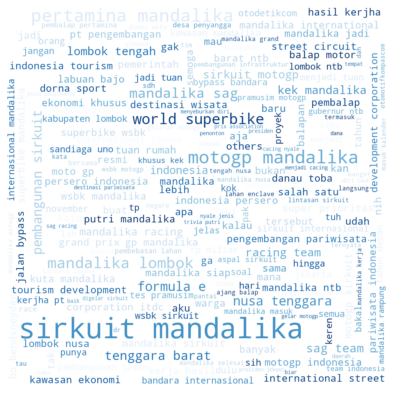

In [271]:
all_text = ' '.join(word for word in df_id_copy1['Embedded_text'])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA',
                      background_color='white').generate(all_text)
plt.figure(figsize=(14,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=2, y=2)
plt.show()